In [19]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

In [20]:
x_src_path = '../Dataset/assignment1New.json'
y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [21]:
data = pd.read_json(x_src_path)

In [22]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [23]:
X = np.nan_to_num(data.values, nan=0, copy=True).astype(int)
y = plagiarised_array
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
#seed 32 results 100% on test score 24

In [25]:
count_0 = 0
count_1 = 0

for element in y_test:
    if element == 0:
        count_0 += 1
    elif element == 1:
        count_1 += 1

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 13
Number of 1s: 4


In [26]:
# for i in range(50):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
#     print("this stage is " + str(i))
#     count_y_train_1 = np.sum(y_train == 1)
#     count_y_test_1 = np.sum(y_test == 1)
#     print(count_y_train_1)
#     print(count_y_test_1)
#     print("")

In [27]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.8823529411764706


In [28]:
# predictions = p.predict(X_test)
# for i in range(len(X_test)):
#     print("Predicted:", predictions[i], "Actual:", y_test[i])
y_pred = p.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.50      0.67         4

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17



In [29]:
predictions = p.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0


In [30]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 64

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(2, activation='softmax')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

]

In [31]:
LOSS_FN = keras.losses.sparse_categorical_crossentropy

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [32]:
TRAINING_EPOCHS = 20

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/20
2/2 [==============================] - 0s 5ms/step - loss: 2598.1445 - accuracy: 0.4865
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 2296.0261 - accuracy: 0.8378
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 875.1842 - accuracy: 0.8919
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 977.3984 - accuracy: 0.8919
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 760.0585 - accuracy: 0.9459
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 702.4393 - accuracy: 0.9189
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 553.0256 - accuracy: 0.9189
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 461.1285 - accuracy: 0.8919
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 221.1687 - accuracy: 0.8919
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 60.3428 - accuracy: 0.9730


In [33]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

1/1 [==============================] - 0s 108ms/step - loss: 119.3755 - accuracy: 0.8235


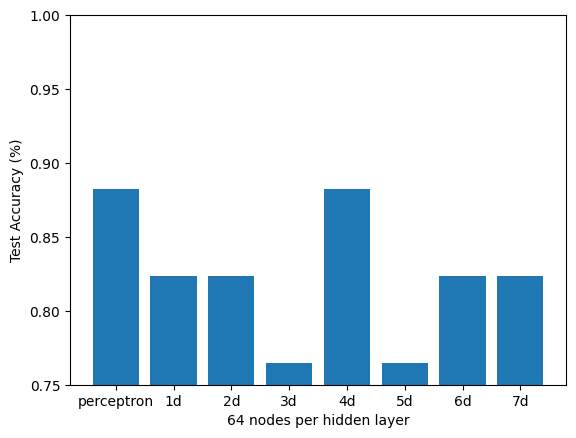

In [34]:
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.xlabel(str(NODES_PER_HIDDEN_LAYER) + " nodes per hidden layer")
plt.show()

In [35]:
# Assuming `models` is a list of models
for idx, model in enumerate(models):
    # Make predictions for the current model
    y_pred_model = model.predict(X_test)
    y_pred_class = np.argmax(y_pred_model, axis=1)
    print(classification_report(y_test, y_pred_class))


1/1 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17

1/1 [==============================] - 0s 37ms/step
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.67      0.50      0.57         4

    accuracy                           0.82        17
   macro avg       0.76      0.71      0.73        17
weighted avg       0.81      0.82      0.81        17

1/1 [==============================] - 0s 45ms/step
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.50      0.25      0.33         4

    accuracy              